<a href="https://colab.research.google.com/github/Cherberushka/BOT_YT/blob/master/HW_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №2


Перед вами датасет с данными о вреде курения


Структура данных:

1. **gender**: Пол пациента
2. **age**: Возраст пациента
3. **hypertension**: Наличие гипертонии у пациента 1 - есть, 0 - не наблюдалось
4. **heart_disease**: Наличие у пациента болезней связанных с сердцем 1 - есть, 0 - здоров
5. **ever_married**: Брак - (Состоял в браке/ холост)
6. **work_type**: Работ - Ребенок(children), Госслужащий(Govt_jov), Никогда не работал(Never_worked), Самозанятый(self-employed) или Скрыто(private)
7. **Residence_type**: место работы городская среда(Urban)/удаленка или за городом(Rural)
8. **avg_glucose_level**: средний уровень глюкозы в крови
9. **bmi**: индекс массы тела
10. **smoking_status**: Пациент курит(Иногда, всегда, время от времени или Unknown - неизвестно)
11. **stroke**: Перенесенный инсульт (1 - пациент перенес инсульт, 0 - инсульта не было) - *ваш target*

## Ваша задача

№1 Восстановить целостностью данных, реализовать функцию позволяющие выполнять заполнение данных по среднему или по медианному значению в Series. 

1.  Заполнить пропуски
2.  Убрать дубликаты
3.  Убрать некорректные данные и.т.п.


№2 Построить baseline-модель, попытаться выбить лучший скор (сравнить несколько моделей)

№3 Сделать визуализацию для мини-исследования о вреде курения с разбивкой по половой принадлежности пациентов с помощью pandas, matplotlib, seaborn, plotly и других инструментов.

# №1 Восстановить целостностью данных, реализовать функцию позволяющие выполнять заполнение данных по среднему или по медианному значению в Series.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder



In [ ]:
url = 'https://drive.google.com/file/d/1He5GI5_Gd8uXYfeETLBISQ5BszX0o4pU/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
data_index = pd.read_csv(url,names=['index','gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'])

In [ ]:
data_index.head()

,index,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,NaN,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,0.0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1.0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,NaN,formerly smoked,1
3,2.0,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
4,3.0,Male,80.0,0.0,1.0,Yes,Private,NaN,105.92,32.5,never smoked,1


In [ ]:
data = data_index.drop('index',axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,NaN,formerly smoked,1
3,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
4,Male,80.0,0.0,1.0,Yes,Private,NaN,105.92,32.5,never smoked,1


In [ ]:
data = data.drop_duplicates()
data = data.drop(index=[0]).reset_index(drop=True)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             5106 non-null   object
 1   age                4963 non-null   object
 2   hypertension       4903 non-null   object
 3   heart_disease      4282 non-null   object
 4   ever_married       5106 non-null   object
 5   work_type          4773 non-null   object
 6   Residence_type     4302 non-null   object
 7   avg_glucose_level  4622 non-null   object
 8   bmi                4167 non-null   object
 9   smoking_status     5106 non-null   object
 10  stroke             5106 non-null   object
dtypes: object(11)
memory usage: 438.9+ KB


Не равное колличество Non-Null значений строк - соответствует пропущенным значениям

In [ ]:
for i in data.columns:
  print(f'{i}:', data[i].value_counts(), sep='\n', end=2*'\n')

gender:
Female    2990
Male      2115
Other        1
Name: gender, dtype: int64

age:
78.0    99
57.0    91
52.0    86
54.0    83
50.0    83
        ..
0.48     3
0.16     3
1.4      2
0.4      2
0.08     2
Name: age, Length: 104, dtype: int64

hypertension:
0.0    4430
1.0     473
Name: hypertension, dtype: int64

heart_disease:
0.0    4052
1.0     230
Name: heart_disease, dtype: int64

ever_married:
Yes    3350
No     1756
Name: ever_married, dtype: int64

work_type:
Private          2726
Self-employed     771
children          629
Govt_job          625
Never_worked       22
Name: work_type, dtype: int64

Residence_type:
Urban    2168
Rural    2134
Name: Residence_type, dtype: int64

avg_glucose_level:
93.88     6
72.49     5
73.0      5
91.68     5
83.16     5
         ..
94.07     1
111.93    1
94.4      1
95.57     1
85.28     1
Name: avg_glucose_level, Length: 3682, dtype: int64

bmi:
28.4    35
28.7    35
23.4    33
26.1    33
27.6    32
        ..
51.8     1
13.4     1
56.0    

переведём категориальные признаки в дискретные(численные) значения

In [ ]:
series_encod = data[['gender','hypertension','ever_married','work_type','Residence_type','smoking_status']]
df = pd.DataFrame(OrdinalEncoder().fit_transform(series_encod), columns = series_encod.columns)
df

,gender,hypertension,ever_married,work_type,Residence_type,smoking_status
0,1.0,0.0,1.0,2.0,1.0,1.0
1,0.0,0.0,1.0,3.0,0.0,2.0
2,1.0,0.0,1.0,2.0,NaN,2.0
3,0.0,0.0,1.0,2.0,1.0,3.0
4,0.0,1.0,1.0,3.0,0.0,2.0
...,...,...,...,...,...,...
5101,0.0,1.0,1.0,2.0,1.0,2.0
5102,0.0,0.0,1.0,3.0,1.0,2.0
5103,0.0,0.0,1.0,3.0,0.0,2.0
5104,1.0,0.0,1.0,2.0,0.0,1.0


In [ ]:
col_list = []
for i in df.columns:
  col_list.append(i)


In [ ]:
for i in col_list:
  data[i] = df[i]
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0.0,1.0,1.0,2.0,1.0,228.69,NaN,1.0,1
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,NaN,2.0,1
2,1.0,80.0,0.0,1.0,1.0,2.0,NaN,105.92,32.5,2.0,1
3,0.0,49.0,0.0,0.0,1.0,2.0,1.0,171.23,34.4,3.0,1
4,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,24.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5101,0.0,80.0,1.0,0.0,1.0,2.0,1.0,83.75,NaN,2.0,0
5102,0.0,81.0,0.0,0.0,1.0,3.0,1.0,125.2,40.0,2.0,0
5103,0.0,35.0,0.0,0.0,1.0,3.0,0.0,82.99,30.6,2.0,0
5104,1.0,51.0,0.0,0.0,1.0,2.0,0.0,166.29,25.6,1.0,0


Изменим тип данныых на float

In [ ]:
data = data.astype(np.float)

<ipython-input-131-bd93a00e21b0>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = data.astype(np.float)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5106 non-null   float64
 1   age                4963 non-null   float64
 2   hypertension       4903 non-null   float64
 3   heart_disease      4282 non-null   float64
 4   ever_married       5106 non-null   float64
 5   work_type          4773 non-null   float64
 6   Residence_type     4302 non-null   float64
 7   avg_glucose_level  4622 non-null   float64
 8   bmi                4167 non-null   float64
 9   smoking_status     5106 non-null   float64
 10  stroke             5106 non-null   float64
dtypes: float64(11)
memory usage: 438.9 KB


In [ ]:
colum = []
col_list = []
for i in data.columns:
  colum.append(i)
colum

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

Заменим пропущенные значения на среднее

In [ ]:
mean1 = data['gender'].mean()
print(mean1)
print(mean1.round(2))

0.4146102624363494
0.41


In [ ]:
for i in colum:
  mean = data[i].mean()
  data[i] = data[i].fillna(value=mean1.round(2))
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0.0,1.0,1.0,2.0,1.00,228.69,0.41,1.0,1.0
1,0.0,61.0,0.0,0.0,1.0,3.0,0.00,202.21,0.41,2.0,1.0
2,1.0,80.0,0.0,1.0,1.0,2.0,0.41,105.92,32.50,2.0,1.0
3,0.0,49.0,0.0,0.0,1.0,2.0,1.00,171.23,34.40,3.0,1.0
4,0.0,79.0,1.0,0.0,1.0,3.0,0.00,174.12,24.00,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5101,0.0,80.0,1.0,0.0,1.0,2.0,1.00,83.75,0.41,2.0,0.0
5102,0.0,81.0,0.0,0.0,1.0,3.0,1.00,125.20,40.00,2.0,0.0
5103,0.0,35.0,0.0,0.0,1.0,3.0,0.00,82.99,30.60,2.0,0.0
5104,1.0,51.0,0.0,0.0,1.0,2.0,0.00,166.29,25.60,1.0,0.0


# №2 Построить baseline-модель, попытаться выбить лучший скор (сравнить несколько моделей)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
features_ohe = pd.get_dummies(data.drop(labels=['stroke'],axis=1))
target = data['stroke']

In [ ]:
feat_train, feat_test, target_train, target_test = train_test_split(
    features_ohe, target, test_size=0.2, random_state=42)

## Random Forest - работат долго

In [ ]:
forest_params = {"n_estimators": [75, 100, 110], "criterion": ["gini", "entropy"], 
              "max_depth": [2, 4, 6, 8], "min_samples_split": [2, 3, 4], 'max_features': [2, 4, 6, 8]}
random_forest = RandomForestClassifier(random_state=42)
grid_forest_clf = GridSearchCV(random_forest, forest_params, error_score='raise')
grid_forest_clf.fit(feat_train, target_train)

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 110]})

In [ ]:
grid_forest_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
pred_grid = grid_forest_clf.predict(feat_test)
f_1_grid = f1_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
precision_grid = precision_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
recall_grid = recall_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
accuracy_grid = accuracy_score(target_test, pred_grid)

print('Значение F1 = {}, значение precision = {}, значение recall = {}, значение accuracy = {}'.format(round(f_1_grid, 5), 
                                                                                                       round(precision_grid, 5), 
                                                                                                       round(recall_grid, 5), 
                                                                                                       round(accuracy_grid, 5)))

Значение F1 = 0.90946, значение precision = 0.88229, значение recall = 0.93836, значение accuracy = 0.93836


## AdaBoost

In [ ]:
ada_params = {"n_estimators": range(1,25), "learning_rate": [0.01, 0.1, 0.5, 1], 
              "algorithm": ["SAMME", "SAMME.R"]}
ada = AdaBoostClassifier(random_state=42)
grid_ada_clf = GridSearchCV(ada, ada_params, error_score='raise')
grid_ada_clf.fit(feat_train, target_train)

GridSearchCV(error_score='raise', estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': range(1, 25)})

In [ ]:
grid_ada_clf.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 13}

In [ ]:
pred_grid = grid_ada_clf.predict(feat_test)
f_1_grid = f1_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
precision_grid = precision_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
recall_grid = recall_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
accuracy_grid = accuracy_score(target_test, pred_grid)

print('Значение F1 = {}, значение precision = {}, значение recall = {}, значение accuracy = {}'.format(round(f_1_grid, 5), 
                                                                                                       round(precision_grid, 5), 
                                                                                                       round(recall_grid, 5), 
                                                                                                       round(accuracy_grid, 5)))

Значение F1 = 0.91182, значение precision = 0.91349, значение recall = 0.93933, значение accuracy = 0.93933


## Логистическая регрессия

In [ ]:
grid_log_clf = LogisticRegression(random_state=42)
grid_log_clf.fit(feat_train, target_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
pred_grid = grid_log_clf.predict(feat_test)
f_1_log = f1_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
precision = precision_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
recall = recall_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
accuracy_log = accuracy_score(target_test, pred_grid)
print('Значение F1 = {}, значение precision = {}, значение recall = {}, значение accuracy = {}'.format(f_1_log, precision, recall, accuracy_log))

Значение F1 = 0.9687184661957619, значение precision = 0.9393346379647749, значение recall = 1.0, значение accuracy = 0.9393346379647749


## Линейная модель SGD

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(feat_train,target_train)

SGDClassifier(random_state=42)

In [ ]:
pred_grid = sgd_clf.predict(feat_test)
f_1_log = f1_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
precision = precision_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
recall = recall_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
accuracy_log = accuracy_score(target_test, pred_grid)
print('Значение F1 = {}, значение precision = {}, значение recall = {}, значение accuracy = {}'.format(f_1_log, precision, recall, accuracy_log))

Значение F1 = 0.9075008389037532, значение precision = 0.8820693994654474, значение recall = 0.9344422700587084, значение accuracy = 0.9344422700587084


# 3. Балансировка классов

In [ ]:
print(data['stroke'].value_counts())

0.0    4857
1.0     249
Name: stroke, dtype: int64


In [ ]:
print('Колличество перенесших инсульт составляет: ', 249/(4857 + 249) * 100, '%', sep='')

Колличество перенесших инсульт составляет: 4.876615746180963%


Только '≈' 5% клиентов перенесли инсульт.
Т.о. класс является не сбалонсированным

In [ ]:
from imblearn.over_sampling import RandomOverSampler

a = data['stroke']
b = data.drop(['stroke'], axis=1)
ros = RandomOverSampler(random_state=42)
a_resample, b_resample = ros.fit_resample(b, a)
b_resample.value_counts()

1.0    4857
0.0    4857
Name: stroke, dtype: int64

# 4. Прогнозирование после ребалансировки

In [ ]:
feat_train, feat_test, target_train, target_test = train_test_split(
    a_resample, b_resample, test_size=0.2, random_state=42)

## Линейная модель SGD

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(feat_train,target_train)

SGDClassifier(random_state=42)

In [ ]:
pred_grid = sgd_clf.predict(feat_test)
f_1_log = f1_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
precision = precision_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
recall = recall_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
accuracy_log = accuracy_score(target_test, pred_grid)
print('Значение F1 = {}, значение precision = {}, значение recall = {}, значение accuracy = {}'.format(f_1_log, precision, recall, accuracy_log))

Значение F1 = 0.7207726065203168, значение precision = 0.7665101751493005, значение recall = 0.7308286155429747, значение accuracy = 0.7308286155429747


## Логистическая регрессия

In [ ]:
grid_log_clf = LogisticRegression(random_state=42)
grid_log_clf.fit(feat_train, target_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
pred_grid = grid_log_clf.predict(feat_test)
f_1_log = f1_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
precision = precision_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
recall = recall_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
accuracy_log = accuracy_score(target_test, pred_grid)
print('Значение F1 = {}, значение precision = {}, значение recall = {}, значение accuracy = {}'.format(f_1_log, precision, recall, accuracy_log))

Значение F1 = 0.7518434807225484, значение precision = 0.7520695697349832, значение recall = 0.7519300051466804, значение accuracy = 0.7519300051466804


## AdaBoost

In [ ]:
ada_params = {"n_estimators": range(1,25), "learning_rate": [0.01, 0.1, 0.5, 1], 
              "algorithm": ["SAMME", "SAMME.R"]}
ada = AdaBoostClassifier(random_state=42)
grid_ada_clf = GridSearchCV(ada, ada_params, error_score='raise')
grid_ada_clf.fit(feat_train, target_train)

GridSearchCV(error_score='raise', estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': range(1, 25)})

In [ ]:
grid_ada_clf.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 21}

In [ ]:
pred_grid = grid_ada_clf.predict(feat_test)
f_1_grid = f1_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
precision_grid = precision_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
recall_grid = recall_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
accuracy_grid = accuracy_score(target_test, pred_grid)

print('Значение F1 = {}, значение precision = {}, значение recall = {}, значение accuracy = {}'.format(round(f_1_grid, 5), 
                                                                                                       round(precision_grid, 5), 
                                                                                                       round(recall_grid, 5), 
                                                                                                       round(accuracy_grid, 5)))

Значение F1 = 0.7799, значение precision = 0.78429, значение recall = 0.78075, значение accuracy = 0.78075


## Random Forest

In [ ]:
# forest_params = {"n_estimators": 100, "criterion": ["gini", "entropy"], 
              # "max_depth": [2, 4, 6, 8], "min_samples_split": [2, 3, 4], 'max_features': [2, 4, 6, 8]}
# random_forest = RandomForestClassifier(random_state=42)
# grid_forest_clf = GridSearchCV(random_forest, forest_params, error_score='raise')
# grid_forest_clf.fit(feat_train, target_train)

In [ ]:
grid_forest_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
pred_grid = grid_forest_clf.predict(feat_test)
f_1_grid = f1_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
precision_grid = precision_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
recall_grid = recall_score(target_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
accuracy_grid = accuracy_score(target_test, pred_grid)

print('Значение F1 = {}, значение precision = {}, значение recall = {}, значение accuracy = {}'.format(round(f_1_grid, 5), 
                                                                                                       round(precision_grid, 5), 
                                                                                                       round(recall_grid, 5), 
                                                                                                       round(accuracy_grid, 5)))

Значение F1 = 0.42913, значение precision = 0.76277, значение recall = 0.54452, значение accuracy = 0.54452


# 5. Сделать визуализацию для мини-исследования о вреде курения с разбивкой по половой принадлежности пациентов

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

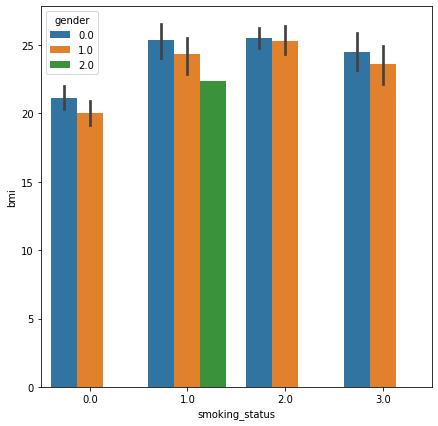

In [ ]:
plt.figure(figsize=(7, 7))
sns.barplot(data=data, x='smoking_status', y='bmi', hue='gender')
# , order=data['smoking_status'].set_title('Курение от индекс массы тела')
# , annot = True

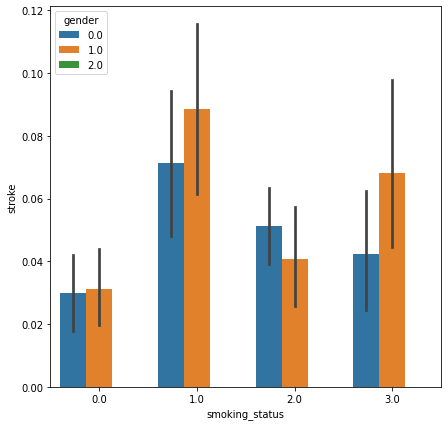

In [ ]:
plt.figure(figsize=(7, 7))
sns.barplot(data=data, x='smoking_status', y='stroke', hue='gender')

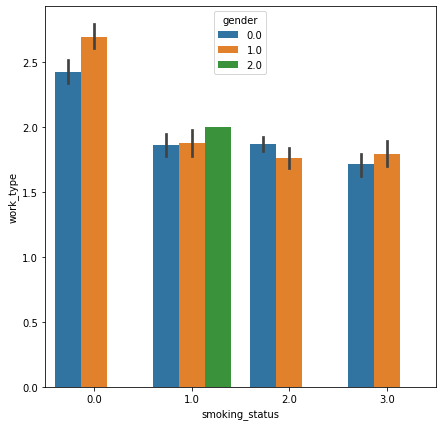

In [ ]:
plt.figure(figsize=(7, 7))
sns.barplot(data=data, x='smoking_status', y='work_type', hue='gender')

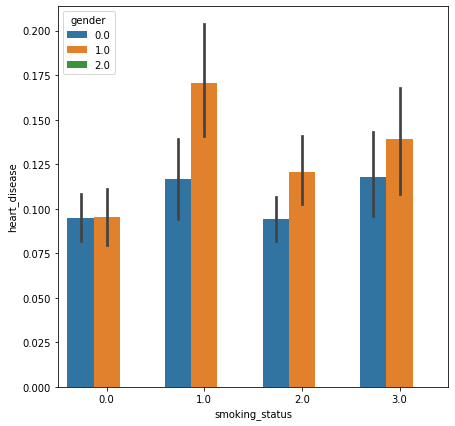

In [ ]:
plt.figure(figsize=(7, 7))
sns.barplot(data=data, x='smoking_status', y='heart_disease', hue='gender')